 # Mental Health in Tech Workplace 

 
 The goal of this dataset and notebook is to explore the influences of mental health of people who work in tech, and to be able to predict who could use intervention and help

Dataset from Kaggle: https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey/data
- downloaded in a CSV file named survey.csv
Original dataset from https://osmihelp.org/ 

Questions Worth Exploring:
How does the frequency of mental health illness and attitudes towards mental health vary by geographic location?
What are the strongest predictors of mental health illness or certain attitudes towards mental health in the workplace?


My objective through this project is to be able to predict how different work environment, benefits and work wellness programs effect an employees percieved difficulty with discussing mental health issues. These insights could help Human Resources departments with implementing better resources and employee outreach based on the company enviornment and culture for a more welcoming and inclusive for those with mental health difficulties. 

I needed some more data to supplement the survey answers. Adding __ and ____ and ____ boosted the 

### Import Libraries

In [783]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pylab as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve

Category Descriptions:

State: If you live in the United States, which state or territory do you live in?

self_employed: Are you self-employed?

family_history: Do you have a family history of mental illness?

treatment: Have you sought treatment for a mental health condition?

work_interfere: If you have a mental health condition, do you feel that it interferes with your work?

no_employees: How many employees does your company or organization have?

remote_work: Do you work remotely (outside of an office) at least 50% of the time?

tech_company: Is your employer primarily a tech company/organization?

benefits: Does your employer provide mental health benefits?

care_options: Do you know the options for mental health care your employer provides?

wellness_program: Has your employer ever discussed mental health as part of an employee wellness program?

seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?

anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?

leave: How easy is it for you to take medical leave for a mental health condition?

mental_health_consequence: Do you think that discussing a mental health issue with your employer would have negative consequences?

phys_health_consequence: Do you think that discussing a physical health issue with your employer would have negative consequences?

coworkers: Would you be willing to discuss a mental health issue with your coworkers?

supervisor: Would you be willing to discuss a mental health issue with your direct supervisor(s)?

mental_health_interview: Would you bring up a mental health issue with a potential employer in an interview?

phys_health_interview: Would you bring up a physical health issue with a potential employer in an interview?

mental_vs_physical: Do you feel that your employer takes mental health as seriously as physical health?

obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?

comments: Any additional notes or comments

### Reading the Dataset

sources: 
- https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey 
- https://osmihelp.org/

In [790]:
df = pd.read_csv('Downloads/survey.csv') #this file is already in Users/christineyao

# I. Exploratory Data Analysis 

In [763]:
#rows and columns
print(df.shape)
print('Number of rows: 1259')
print('Number of columns: 27')

(1259, 27)
Number of rows: 1259
Number of columns: 27


- We have a total of 1259 rows and 27 columns in the data set

In [703]:
df.head(2)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN


In [704]:
df.head(5)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [705]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

### Determining Categorical, Ordinal and Continuous Features

At first glance, the timestamp is just the time the responant subitted their survey, which is not really important. The comment column is also not that important and hard to analyze and to save time I'll drop that column  and timestamp later on. The state column describes states of those who reside in the US. For those not from the US, it is NaN. We could drop the state column so that we can use all the data from the country column. 

- Ordinal/Categorical features
    - work_interfere
    - no_employees
    - leave
    - coworkers

- Categorical Yes/No/Maybe
    - Family History
    - Treatment
    - Mental Health Consequence
    - Physical Health Consequence
    - Supervisor
    - Mental Health Interview
    - Physical Health Interview
    - Mental vs. Physical
    - Obs Consequence

- Numerical Discreet Features
    - Age

In [785]:
#datatypes of all the columns
df.dtypes

Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

In [764]:
df.isnull().sum() 

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [552]:
#Basic properties of missing values
#As you can see from above the missing values are in state, self employed, work_interfere, and comments
#Will probably drop state and comments later as those are not necessary to predict mental health.

print("fraction of points in State with missing values: ", (df['state'].isnull().sum())/df.shape[0])
print("fraction of points in self_employed with missing values: ", (df['self_employed'].isnull().sum())/df.shape[0])
print("fraction of points in work_interfere with missing values: ", (df['work_interfere'].isnull().sum())/df.shape[0])
print("fraction of points in comments with missing values: ", (df['comments'].isnull().sum())/df.shape[0])

fraction of points in State with missing values:  0.409054805401112
fraction of points in self_employed with missing values:  0.014297061159650517
fraction of points in work_interfere with missing values:  0.2096902303415409
fraction of points in comments with missing values:  0.8697378872120731


In [577]:
# I want to see the percentage missing values in "self_employed" and "work_interfere" columns


self_employed_percent = (df["self_employed"].isnull().sum()/len(df["self_employed"]))*100
work_interfere_percent = (df["work_interfere"].isnull().sum()/len(df["work_interfere"]))*100

print(f"The percentage of missing values in self_employed column is {round(self_employed_percent, 2)}%")
print(f"The percentage of missing values in work_interfere column is {round(work_interfere_percent, 2)}%")


The percentage of missing values in self_employed column is 1.43%
The percentage of missing values in work_interfere column is 20.97%


In [578]:
#Checking to see what values are nan in work interfere and self employed
df['self_employed'].unique() #[nan, 'Yes', 'No']
df['work_interfere'].unique() #['Often', 'Rarely', 'Never', 'Sometimes', nan]

array(['Often', 'Rarely', 'Never', 'Sometimes', nan], dtype=object)

There are a lot of null values in state, which makes sense since not all countries in the country category is the United States. However, a majority of the values from the survey come from the United States. Many missing values in comments, which is hard to analyze so I might drop this colummn. There are alkso missing values in slef employed and work_interfere

Dropping Unecessary Columns

| Variable Name|  Reason                                                                           |
|:------------:|:---------------------------------------------------------------------------------:|
|  Timestamp   |  All responses are from some time in 2014                                         |
|  state       |  Too many null values (non_US) in State                                           |
|  comments    |  Not really necessary for predicting the target variable, and is too complicated  |

In [791]:
#dropping unecessary columns 
df = df.drop(['comments'], axis= 1)
df = df.drop(['state'], axis= 1)
df = df.drop(['Timestamp'], axis= 1)
df.columns

Index(['Age', 'Gender', 'Country', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [580]:
df.shape

(1259, 24)

The new dataframe has 1251 rows and 24 columns

### gender analysis

In [581]:
print(df['Gender'].describe())

count     1259
unique      49
top       Male
freq       615
Name: Gender, dtype: object


In [709]:
df['Gender'].unique() #these are all the unique features in the gender column.

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

Sort them into either 
- Male, or cis-male. This is someone who was born as a male and indentifies that way
- Female or cis-female. This is someone who was born as female and identifies that way
- Other, gender queer, fluid, androgynous, non-binary, trans categories

In [792]:
df["Gender"].replace(['array of values and mispellings'], 'replaced value', inplace = True)

df['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',
                     'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                      'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make',], 'Male', inplace = True)

df['Gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female',
                     'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
                     'woman',], 'Female', inplace = True)

df["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary',
                     'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                      'Agender', 'A little about you', 'Nah', 'All',
                      'ostensibly male, unsure what that really means', 
                      'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?',
                      'Guy (-ish) ^_^', 'Trans woman',], 'Other', inplace = True)

df['Gender'].value_counts()

/var/folders/vv/7dp6x9hx2pj3bxcnxndv1fpw0000gn/T/ipykernel_27993/2079812357.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





Gender
Male      991
Female    247
Other      21
Name: count, dtype: int64

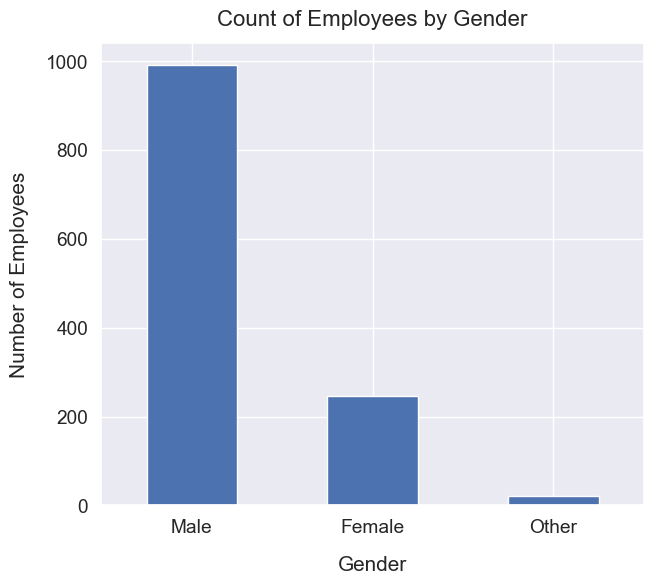

In [793]:
df['Gender'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Gender", labelpad=14)
plt.ylabel("Number of Employees", labelpad=12)
plt.title("Count of Employees by Gender", y=1.02, fontsize=16);
plt.savefig('Gendercount.png')
plt.show()


### age analysis

In [794]:
#cleaning the age column

df['Age'].unique()

array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8,
                11,          -1,          72])

In [789]:
#Setting all the outlier values in the age matrix to the median age of 31 due to personal preference
#31 is a reasonable age for people working in technology
# Outliers of 5years, 8years
# With our domain knowledge, we can confidently go further to treat these as invalid.
# Only 18 and above is accepted to be a legal tech employee.
# I will replace them with the median.

df.loc[df.Age> 80, ["Age"]] = df["Age"].median()
df.loc[df.Age< 18, ["Age"]] = df["Age"].median()

df['Age'].unique()


array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21, 43, 56, 60, 54, 55, 48,
       20, 57, 58, 47, 62, 51, 65, 49, 53, 61, 72])

In [795]:
#drop row where age = 99999999, a negative integer, 329, and less than 18 or greater than 75
#Could replace the crazy age ranges with the mean of the ages but 99999999999 is going to skew the mean a lot. Dropping 9999999999 at least. 
df.drop(df[df['Age'] < 18].index, inplace = True) 
df.drop(df[df['Age'] > 100].index, inplace = True)
df['Age'].unique()

df.shape

(1251, 24)

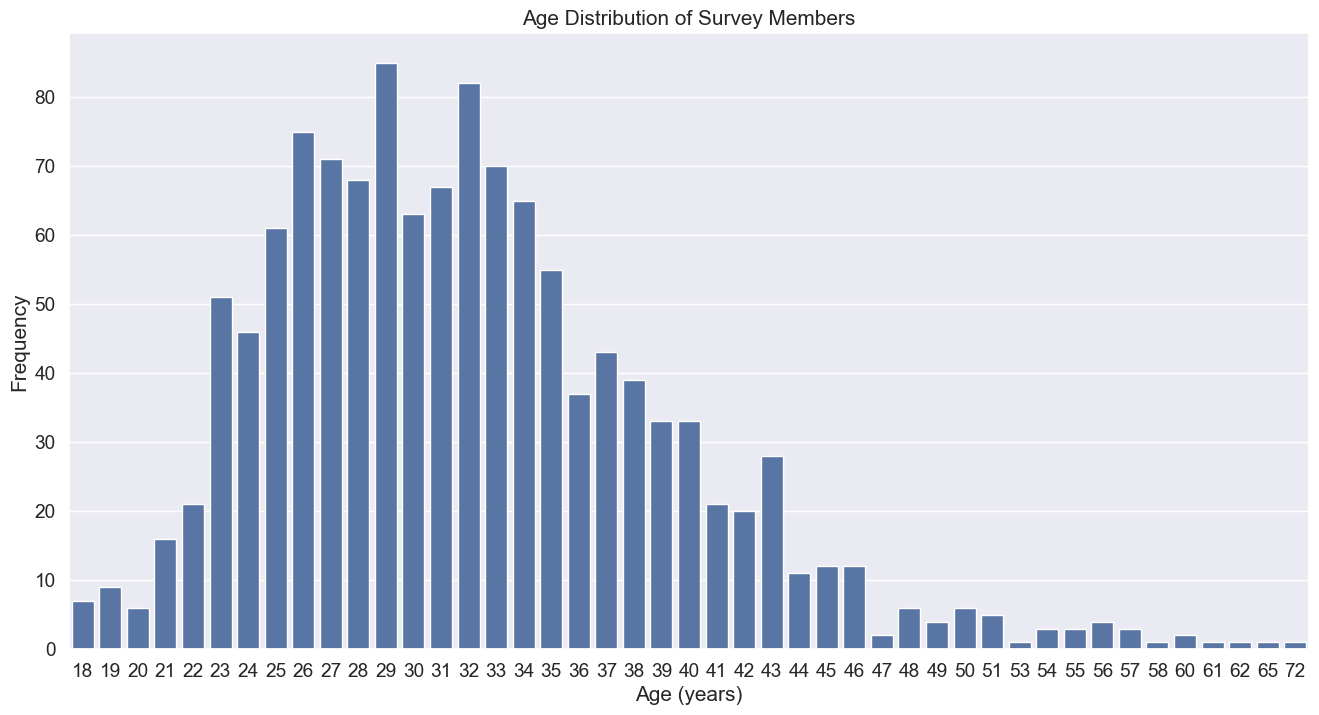

In [714]:
sns.countplot(data=df, x='Age')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.title('Age Distribution of Survey Members')
plt.savefig('age_distribution_barplot_aftercleaning.png')
plt.show()


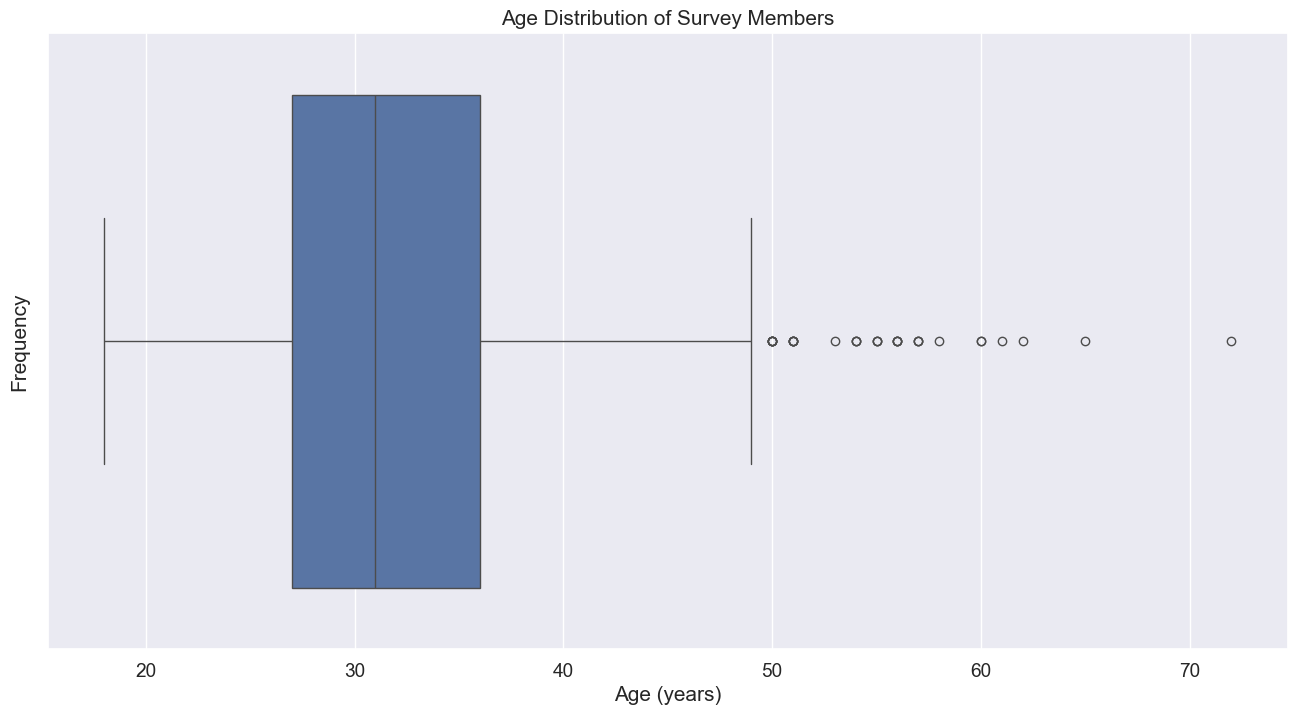

In [600]:
sns.boxplot(data= df, x = 'Age')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.title('Age Distribution of Survey Members')
plt.savefig('age_distribution_boxplot_aftercleaning.png')
plt.show()


There are a wide range of ages, but it's safe to say that we can assume those that are in the workforce are above age 18 and less than around 80 years old. We can assume that the people who submitted age outliers probably just put in a random number because they feel like exposing their real ages 

In [744]:
print(df['Age'].describe()) #after dropping rows with disabilities


count    1251.000000
mean       32.076739
std         7.288272
min        18.000000
25%        27.000000
50%        31.000000
75%        36.000000
max        72.000000
Name: Age, dtype: float64


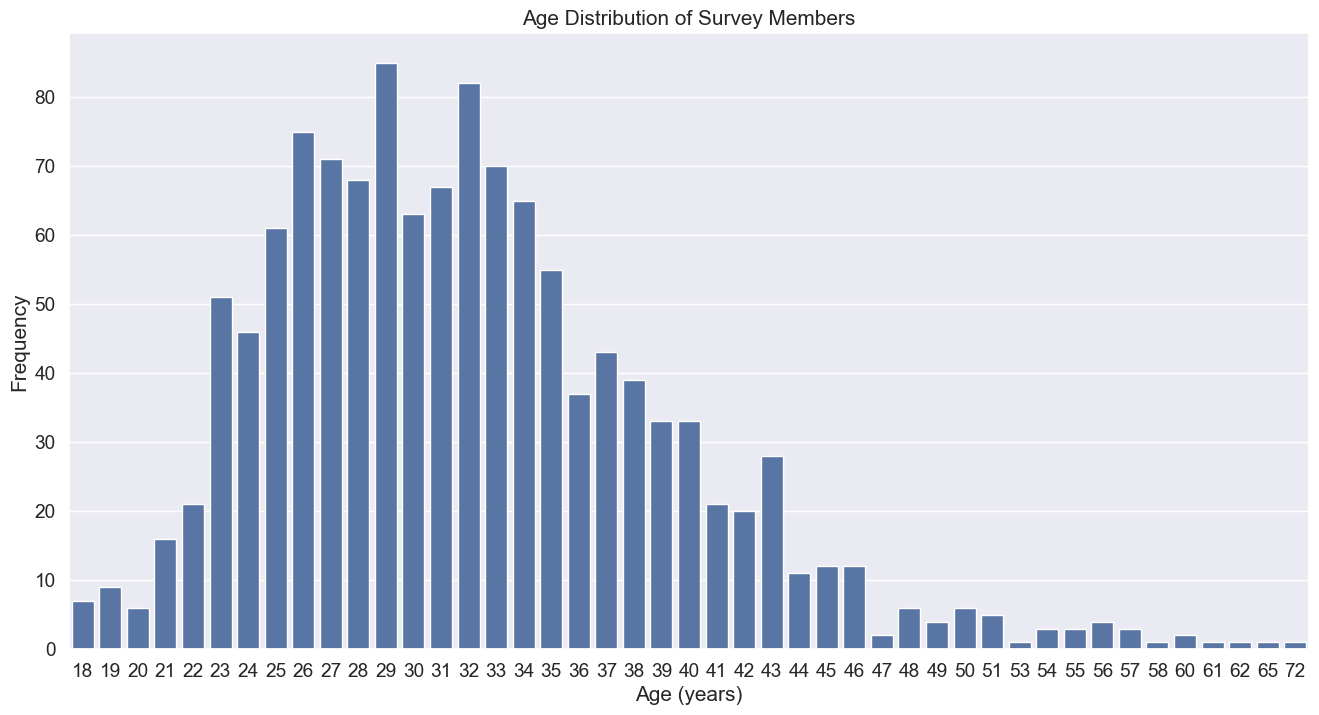

In [587]:
plt.rcParams["figure.figsize"] = (16, 8)

sns.countplot(data=df, x='Age')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.title('Age Distribution of Survey Members')
plt.savefig('age_distribution_barplot.png')
plt.show()


Most workers are around 25-40 age range with a tail towards 50 and 60.

In [797]:
#Changing self employed and work interfere with the mode.

for column in df.columns:

    df[column].fillna(df[column].mode()[0], inplace=True)
    
df.isnull().sum()




/var/folders/vv/7dp6x9hx2pj3bxcnxndv1fpw0000gn/T/ipykernel_27993/2712265921.py:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

### location analysis

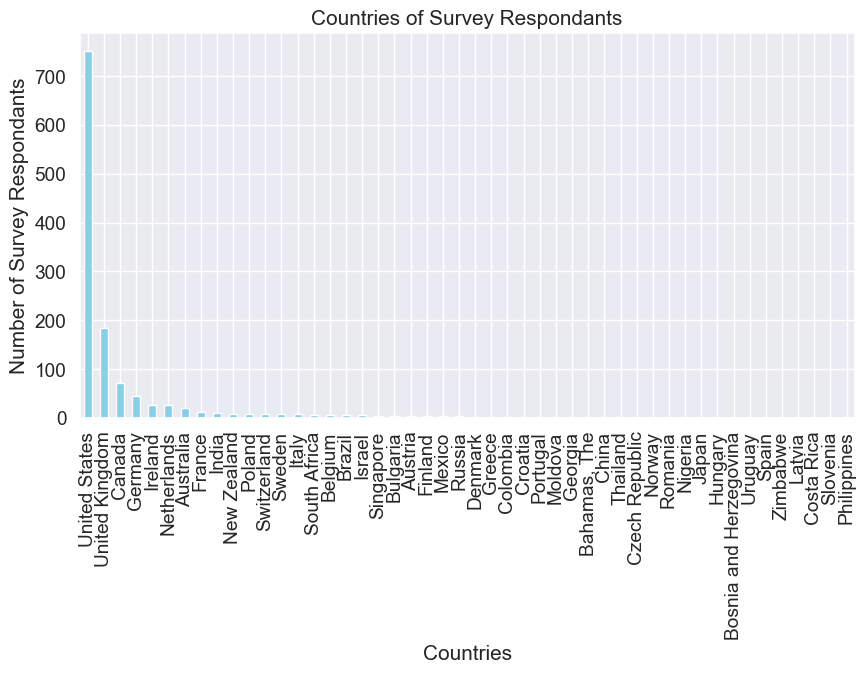

Number of countries
48


In [566]:
#Respondants in different countries
# separate Country column by unique values and bin everything
grouped_data = df['Country'].value_counts()
#histogram is for numerical values, and bar plot is for categorical

# Create a bar chart
plt.figure(figsize=(10, 5))  # Adjust the width (12) as needed
grouped_data.plot(kind='bar', color='skyblue')
plt.title('Countries of Survey Respondants')
plt.xlabel('Countries')
plt.ylabel('Number of Survey Respondants')
plt.show()
print('Number of countries')
print(grouped_data.size)

Frequency of Survey Respondants in European Countries

### Exploring other variables family history, treatment, remote working, self and non self employed, care options



BEFORE DROPPING COMMENTS COLUMN

In [258]:
df['mental_health_consequence'].unique()

array(['No', 'Maybe', 'Yes'], dtype=object)

In [518]:
#gender is male, female or other
#Mental health consequence

mental_gender = df.groupby('Gender')['mental_health_consequence'].value_counts(normalize = True).mul(100).round(2).unstack()

mental_gender

mental_health_consequence,Maybe,No,Yes
Gender,,,
A little about you,NaN,NaN,100.00
Agender,100.00,NaN,NaN
All,NaN,NaN,100.00
Androgyne,NaN,NaN,100.00
Cis Female,100.00,NaN,NaN
Cis Male,50.00,NaN,50.00
Cis Man,100.00,NaN,NaN
Enby,NaN,NaN,100.00
F,34.21,34.21,31.58


In [282]:
import plotly.express as px
import plotly.graph_objects as go
for i in ['Male', 'Female', 'Others']:
    t = df[df['Gender']==i].copy()
    fig = px.histogram(t, x='Age',nbins=40,color='treatment')
    fig.update_layout(
    title=i)
    fig.show()

It seems like a larger percentage of females with mental health issues seek treatment than males. 

In [299]:
df['work_interfere'].describe()

count           989
unique            4
top       Sometimes
freq            464
Name: work_interfere, dtype: object

care_options
No          499
Yes         439
Not sure    313
Name: count, dtype: int64


/var/folders/vv/7dp6x9hx2pj3bxcnxndv1fpw0000gn/T/ipykernel_27993/4171822641.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




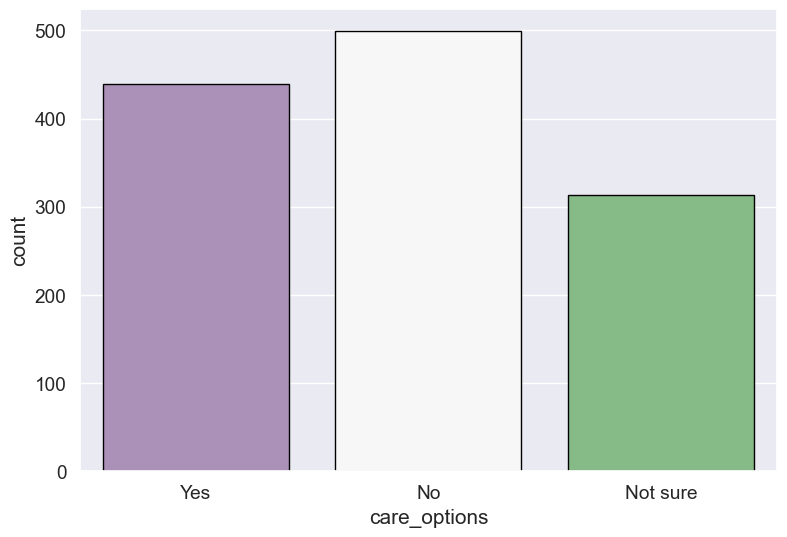

In [328]:
# How many employee know the options for mental health care their employer provides?
desired_orders = ('Yes', 'No', 'Not sure')
print(df["care_options"].value_counts())
plt.figure(figsize=(9,6))
sns.countplot(x="care_options",data=df,edgecolor="black",palette='PRGn', order = desired_orders);

seek_help
No            646
Don't know    363
Yes           250
Name: count, dtype: int64


/var/folders/vv/7dp6x9hx2pj3bxcnxndv1fpw0000gn/T/ipykernel_27993/637742782.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




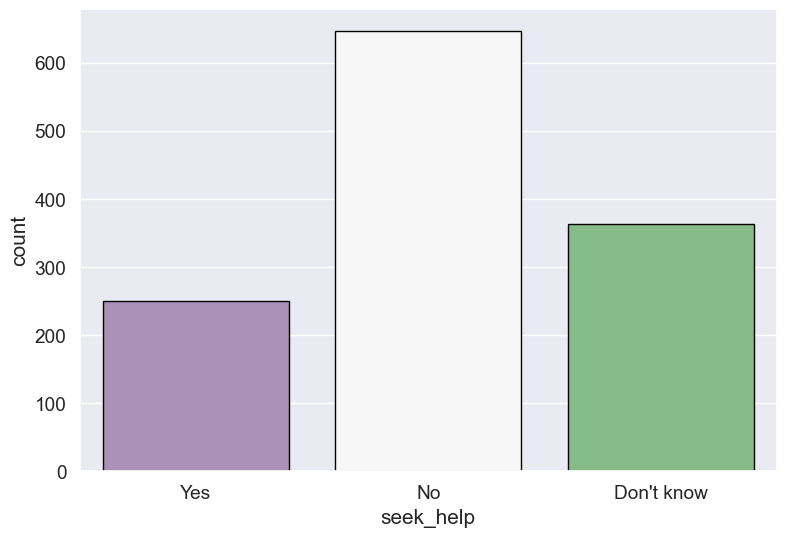

In [442]:
# Does any employer provide resources to learn more about mental health issues and how to seek help
desired_order = ["Yes", "No", "Don't know"]
print(df["seek_help"].value_counts())
plt.figure(figsize=(9,6))
sns.countplot(x="seek_help",data=df,edgecolor="black",palette='PRGn', order = desired_order);
plt.savefig('seek_help_bar.png')

>700 employers do not provide resources or are not clear with the resources to the employees

benefits
Yes           473
Don't know    407
No            371
Name: count, dtype: int64


/var/folders/vv/7dp6x9hx2pj3bxcnxndv1fpw0000gn/T/ipykernel_27993/3464415861.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




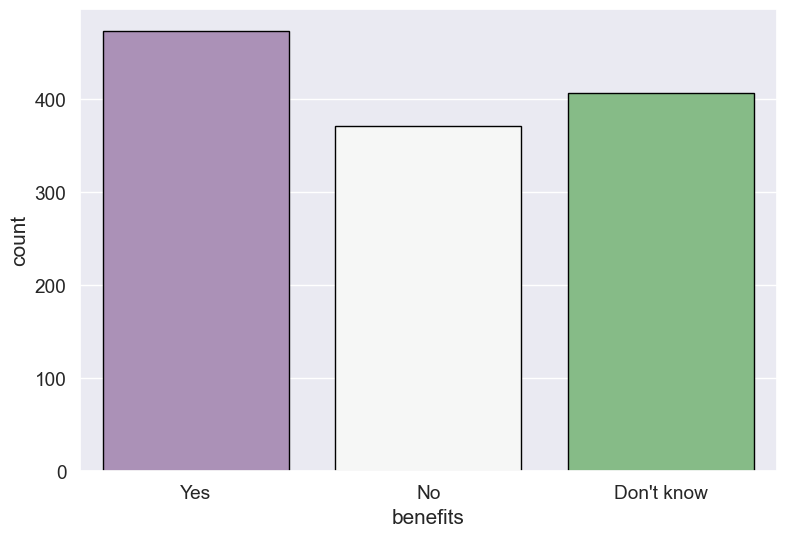

In [326]:
#does your company provide mental health benefits?
print(df["benefits"].value_counts())
plt.figure(figsize=(9,6))
sns.countplot(x="benefits",data=df,edgecolor="black",palette='PRGn', order = desired_order);

wellness_program
No            837
Yes           227
Don't know    187
Name: count, dtype: int64


/var/folders/vv/7dp6x9hx2pj3bxcnxndv1fpw0000gn/T/ipykernel_27993/2560892094.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




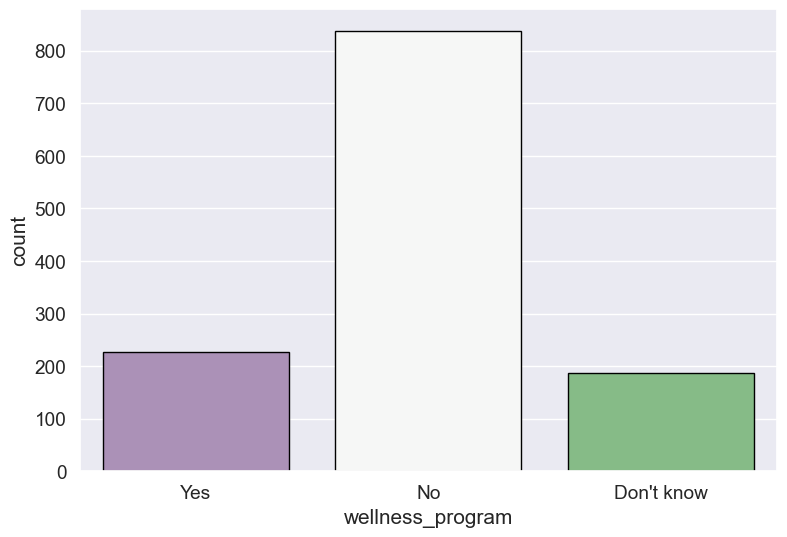

In [327]:
#wellness_program: Has your employer ever discussed mental health as part of an employee wellness program?
print(df["wellness_program"].value_counts())
plt.figure(figsize=(9,6))
sns.countplot(x="wellness_program",data=df,edgecolor="black",palette='PRGn', order = desired_order);

Now I'm interested in seeing if there is a correlation between not knowing about wellness programs at work to treatment , number of employees. Are larger companies more likely to offer mental health benefits and options? Is there a correlation between perceieved negative consequence and No answers for the top three features?

- Relationship between Importance of Mental Health (mental_vs_physical) and Leave¶


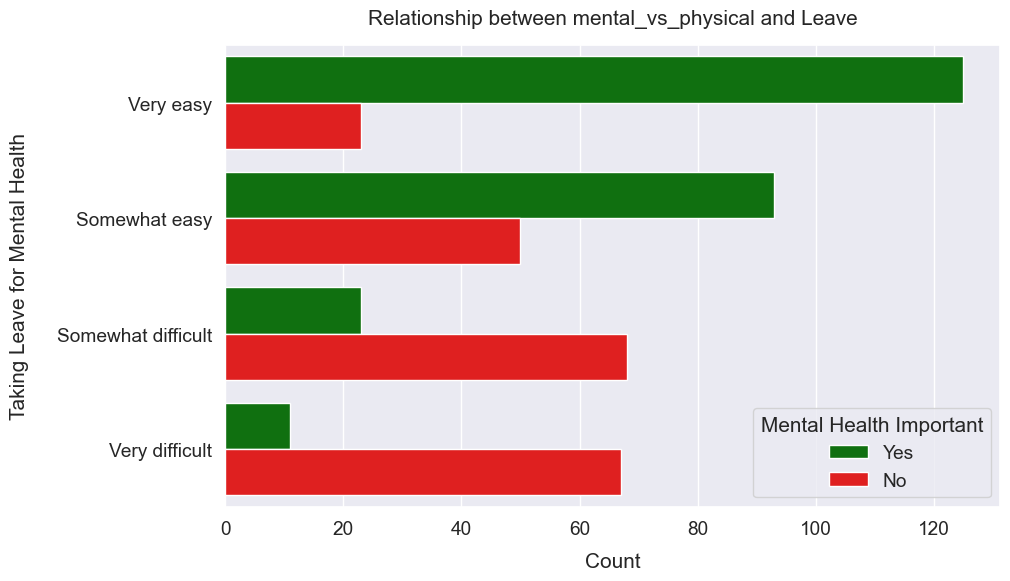

In [486]:
plt.figure(figsize=(10,6)) # Size of the figure
mvp = df[((df['mental_vs_physical'] == 'Yes') | (df['mental_vs_physical'] == 'No')) & (df['leave'] != "Don't know")]['leave']
test = df[((df['mental_vs_physical'] == 'Yes') | (df['mental_vs_physical'] == 'No')) & (df['leave'] != "Don't know")]['mental_vs_physical']

order = df[((df['mental_vs_physical'] == 'Yes') | (df['mental_vs_physical'] == 'No')) & (df['leave'] != "Don't know")]['leave'].value_counts().index 
sns.countplot(y=mvp, data=df, order=order, hue=test, palette=['green', 'red'])

plt.xlabel('Count', labelpad=10)
plt.ylabel('Taking Leave for Mental Health', labelpad=20)
plt.title('Relationship between mental_vs_physical and Leave', pad=15)

leg = plt.legend(loc='best', title='Mental Health Important')
leg._legend_box.align = "center"

plt.savefig('mentalphysical_leave.png')


/var/folders/vv/7dp6x9hx2pj3bxcnxndv1fpw0000gn/T/ipykernel_27993/2273305126.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




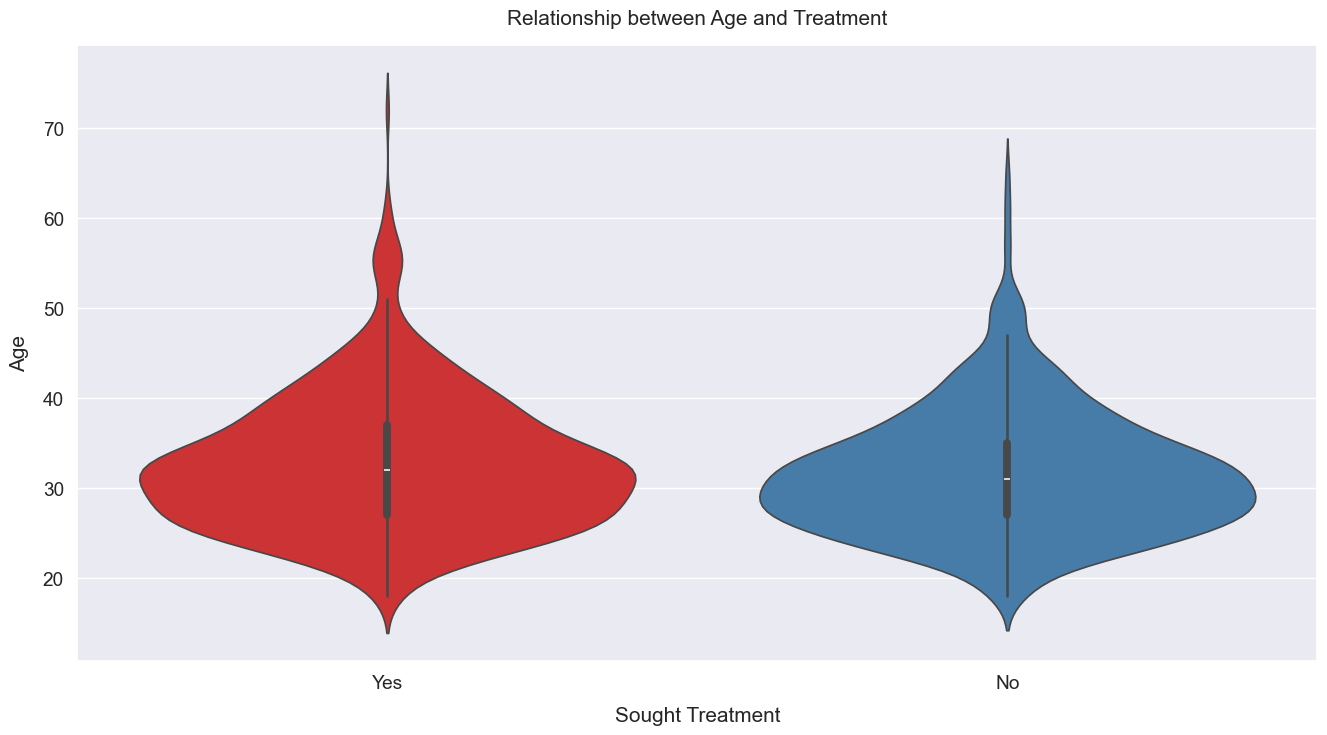

In [641]:
#Relationship between Age and Treatment
sns.violinplot(x='treatment', y='Age', data=df, palette='Set1')
plt.title('Relationship between Age and Treatment', pad=15);
plt.xlabel('Sought Treatment', labelpad=10)
plt.ylabel('Age', labelpad=10)
plt.savefig('age_vs_treatment.png')

Text(0.5, 1.0, 'Relationship between Observed Negative Consequences and Treatment')

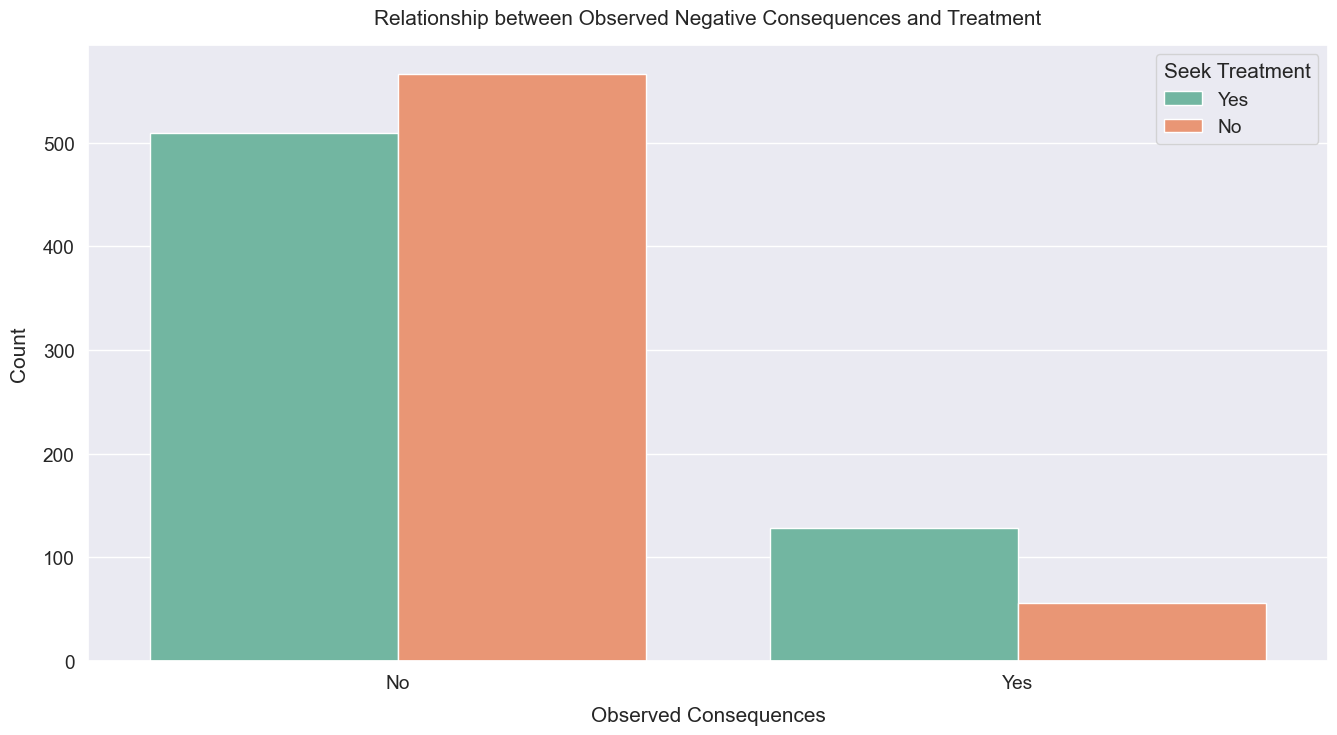

In [633]:
#Relationship between Anonymity and Treatment¶
sns.countplot( x = 'obs_consequence', hue = 'treatment', data = df, palette = 'Set2')
leg = plt.legend(loc='best', title='Seek Treatment')
leg._legend_box.align = "left"
plt.xlabel('Observed Consequences', labelpad=10)
plt.ylabel('Count', labelpad=10);
plt.title('Relationship between Observed Negative Consequences and Treatment', pad=15)


Unfortunately, a lot of people have observed negative consequences for their mental health.  Even so, there are also many who have placed a greater importance on their health, and seeked treatment for their mental health conditions.

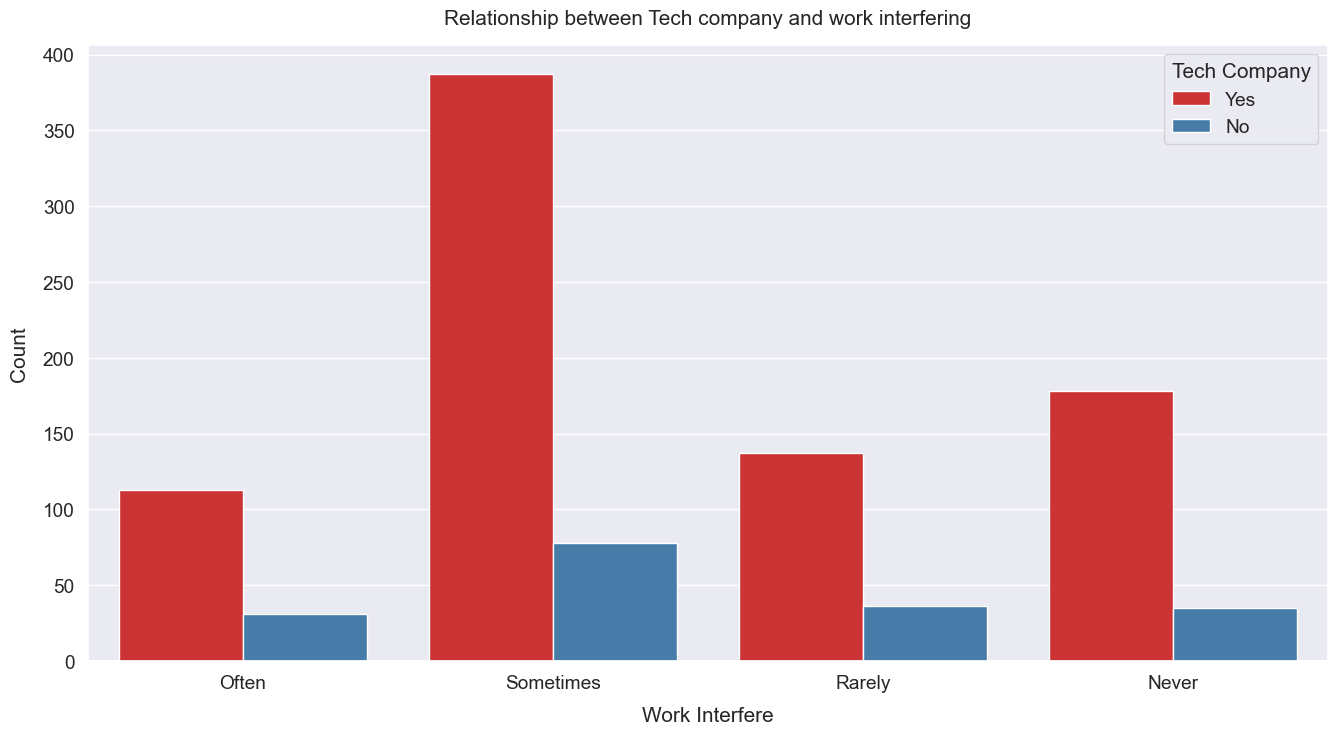

In [631]:
#Relationship between tech company and work interfere
#tech company (yes = works at a tech company, no = does not work at a tech company)
#work_interfere:  if you have a mental health condition does it interfere with your work

order = ['Often','Sometimes','Rarely','Never']
sns.countplot( x = 'work_interfere', hue = 'tech_company', data = df, palette = 'Set1', order = order)
leg = plt.legend(loc='best', title='Tech Company')
leg._legend_box.align = "left"
plt.xlabel('Work Interfere', labelpad=10)
plt.ylabel('Count', labelpad=10);
plt.title('Relationship between Tech company and work interfering', pad=15)
plt.savefig('techcompany_workinterfere.png')


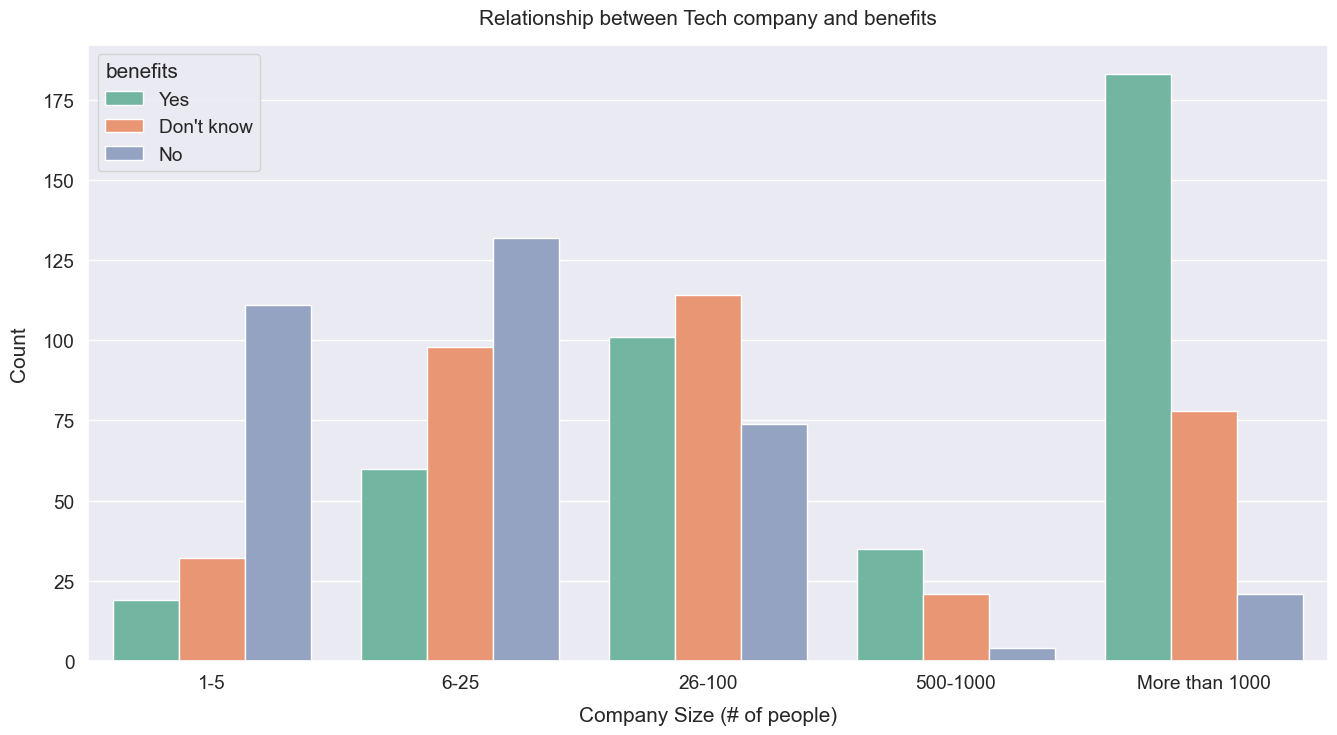

In [632]:
order = ['1-5','6-25','26-100','500-1000','More than 1000']
sns.countplot( x = 'no_employees', hue = 'benefits', data = df, palette = 'Set2', order = order)
leg = plt.legend(loc='best', title='benefits')
leg._legend_box.align = "left"
plt.xlabel('Company Size (# of people)', labelpad=10)
plt.ylabel('Count', labelpad=10);
plt.title('Relationship between Tech company and benefits', pad=15)
plt.savefig('techcompany_benefits.png')

larger companies have more mental health benefits

In [ ]:
sns.countplot(x = '')

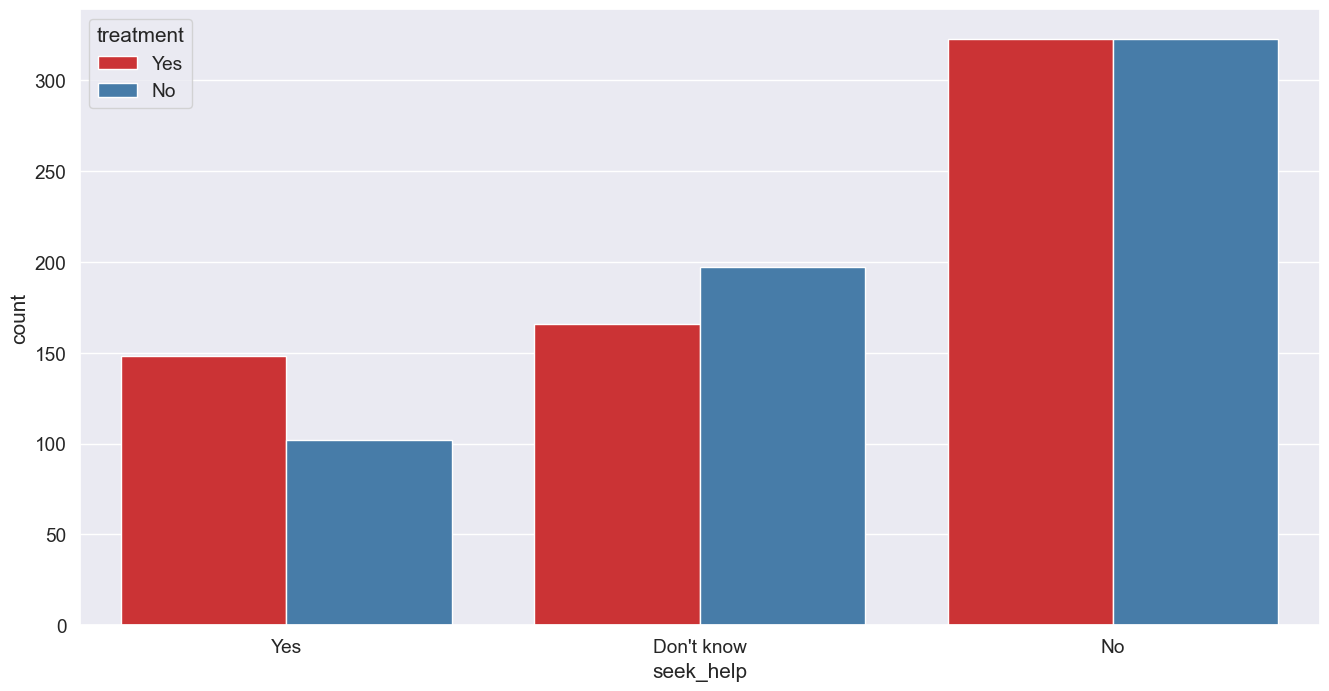

In [482]:
#relationship between seek_help and treatment
sns.countplot( x = 'seek_help', hue = 'treatment', data = df, palette = 'Set1')
plt.savefig('treatment_vs_seekhelp.png')

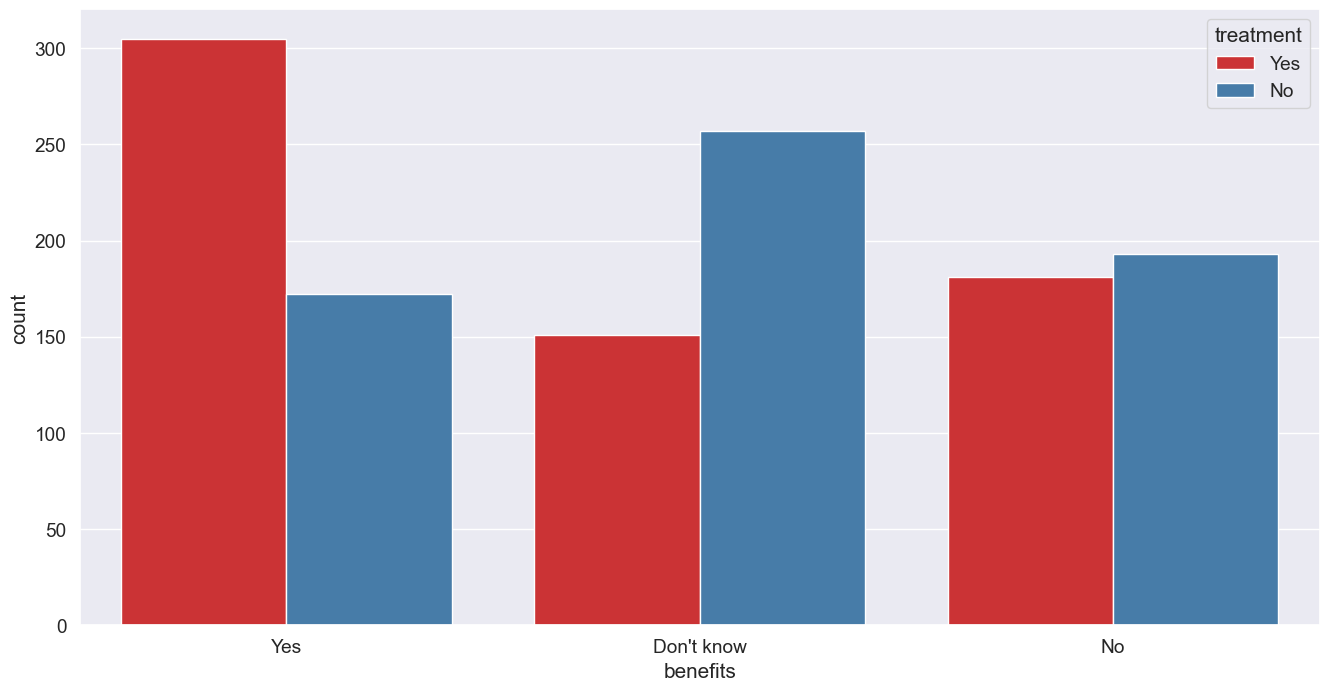

In [481]:
#relationship between benefits and treatment
sns.countplot( x = 'benefits', hue = 'treatment', data = df, palette = 'Set1')
plt.savefig('treatment_vs_benefits.png')

As expected, those with benefits are twice as more likely to seek treatment. Even so, many without benefits have taken matters into their own hands and also sought treatment

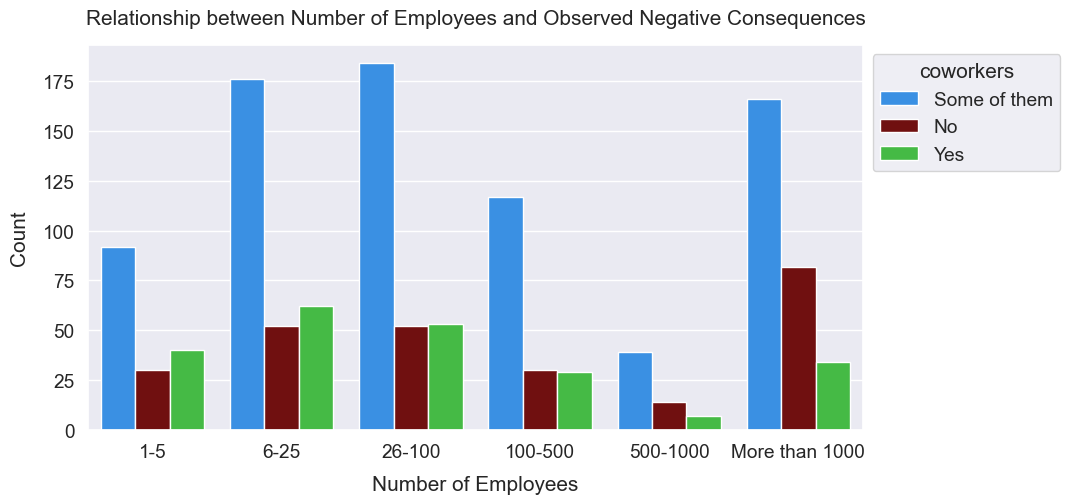

In [515]:

plt.figure(figsize=(10,5)) # Size of the figure
order = ['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000']
ax = sns.countplot(x='no_employees', hue='coworkers',  data=df, order=order, palette=['dodgerblue', 'maroon', 'limegreen'])
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel('Number of Employees', labelpad=10)
plt.ylabel('Count', labelpad=10);
plt.title('Relationship between Number of Employees and Observed Negative Consequences', pad=15);
plt.savefig('relationship_no_employees_obsconsequence.png')

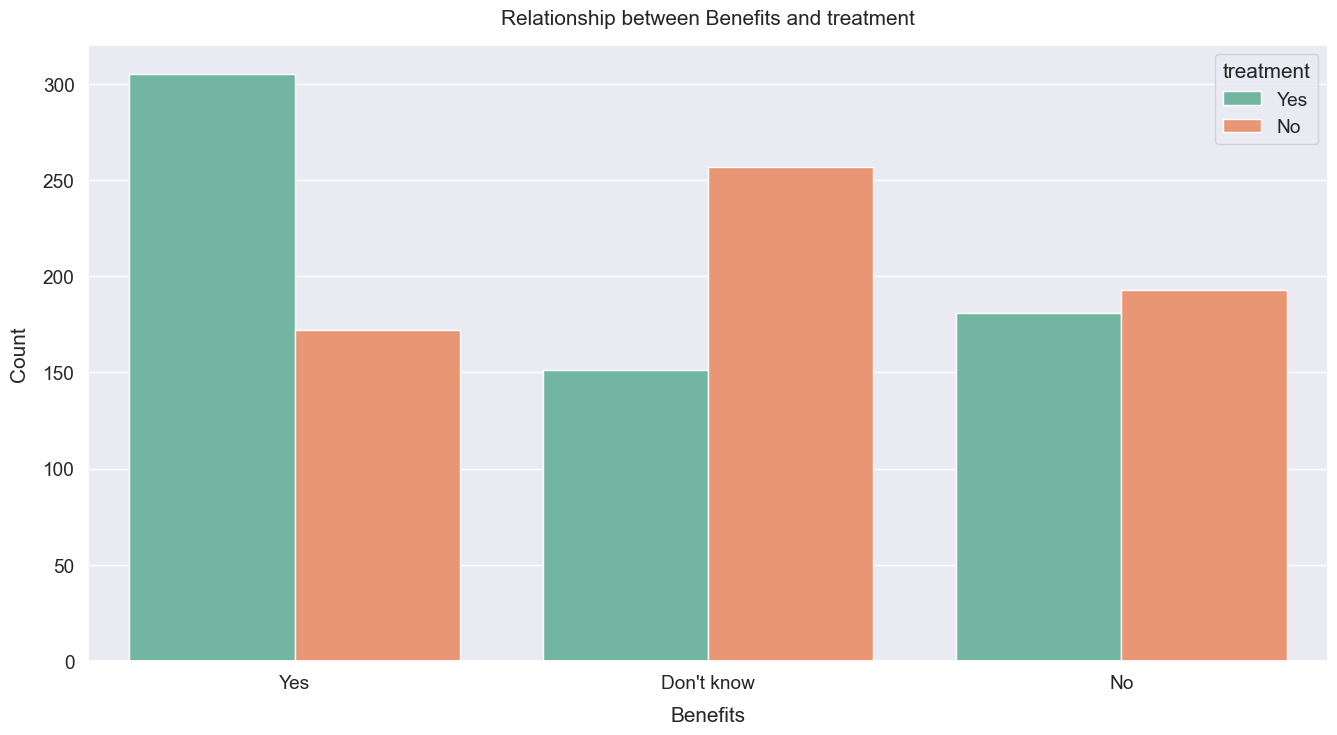

In [640]:
sns.countplot(x='benefits', data=df, hue='treatment', palette= 'Set2')
leg = plt.legend(loc='best', title='treatment')
leg._legend_box.align = "left"
plt.xlabel('Benefits', labelpad=10)
plt.ylabel('Count', labelpad=10)
plt.title('Relationship between Benefits and treatment', pad=15);
plt.savefig('relationship_treatment_benefits.png')

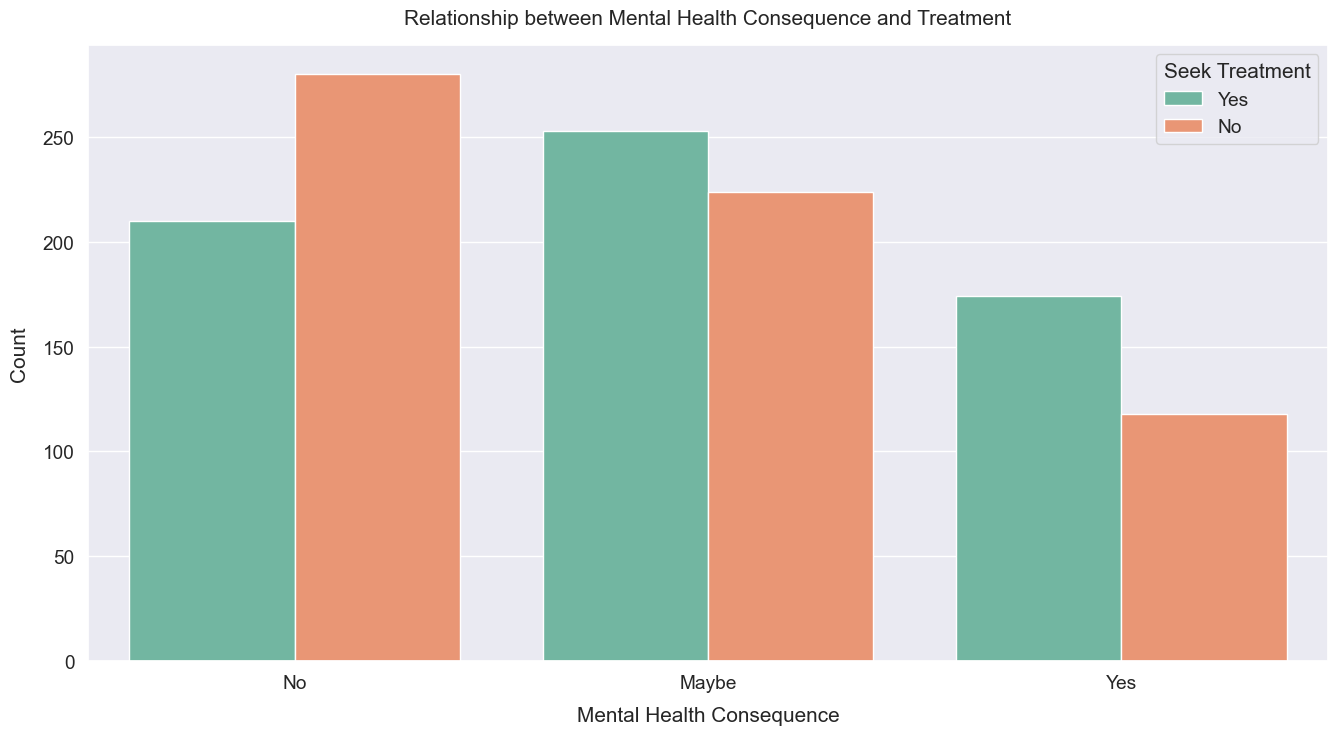

In [635]:
sns.countplot(x='mental_health_consequence', data=df, hue='treatment', palette='Set2')
leg = plt.legend(loc='best', title='Seek Treatment')
leg._legend_box.align = "left"
plt.xlabel('Mental Health Consequence', labelpad=10)
plt.ylabel('Count', labelpad=10)
plt.title('Relationship between Mental Health Consequence and Treatment', pad=15);
plt.savefig('relationship_mhc_treatment.png')

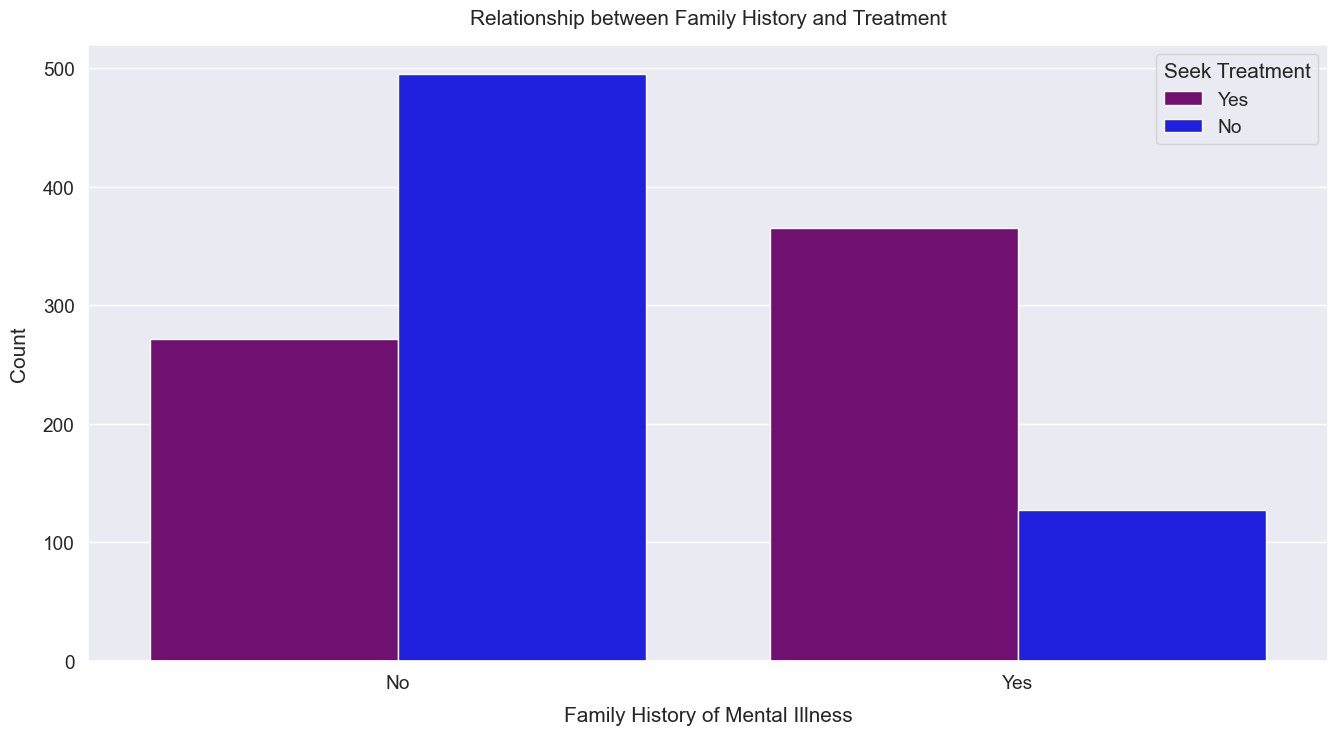

In [479]:
sns.countplot(x='family_history', data=df, hue='treatment', palette=['purple', 'blue'])
leg = plt.legend(loc='best', title='Seek Treatment')
leg._legend_box.align = "left"
plt.xlabel('Family History of Mental Illness', labelpad=10)
plt.ylabel('Count', labelpad=10)
plt.title('Relationship between Family History and Treatment', pad=15);
plt.savefig('relationship_family_treatment.png')

Age range is around 30. And the amount of people who did not seek treatment is slightly smaller than those that did.

anonymity
Don't know    815
Yes           372
No             64
Name: count, dtype: int64


/var/folders/vv/7dp6x9hx2pj3bxcnxndv1fpw0000gn/T/ipykernel_27993/2316922834.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




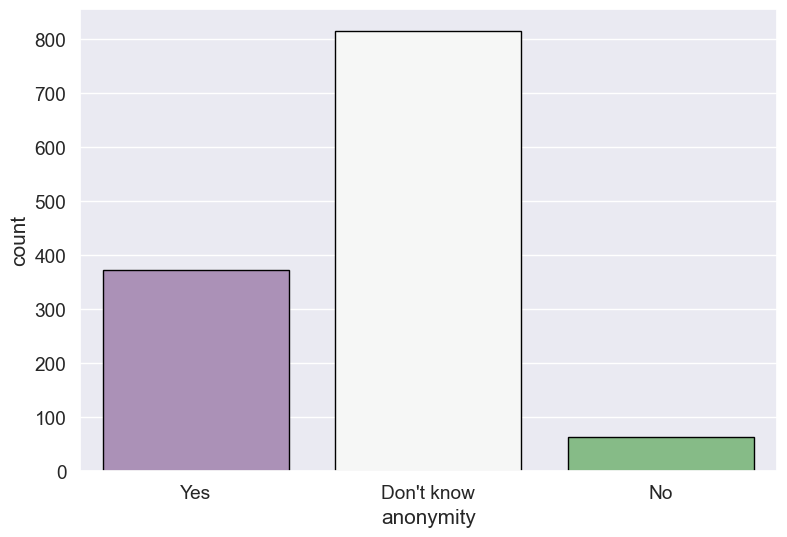

In [308]:
#Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?
print(df["anonymity"].value_counts())
plt.figure(figsize=(9,6))
sns.countplot(x="anonymity",data=df,edgecolor="black",palette='PRGn');


leave
Very easy             206
Somewhat easy         266
Somewhat difficult    126
Very difficult         98
Don't know            563
Name: count, dtype: int64


/var/folders/vv/7dp6x9hx2pj3bxcnxndv1fpw0000gn/T/ipykernel_27993/242402150.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




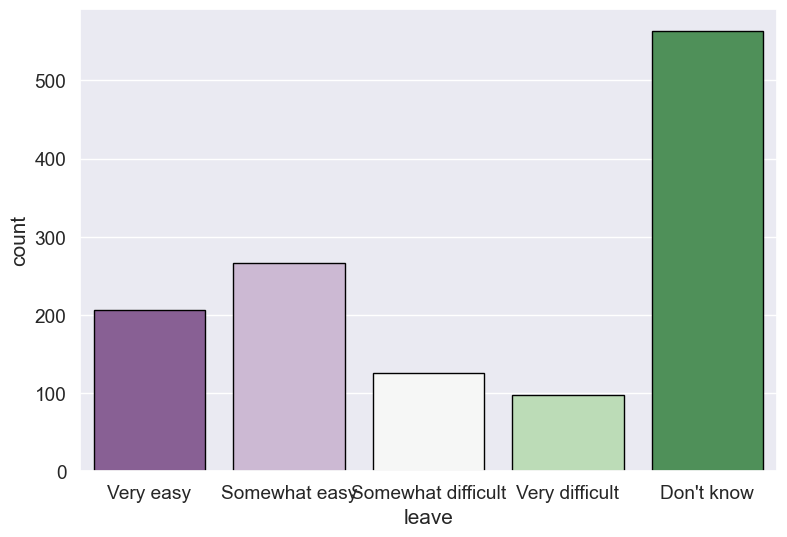

In [504]:
#How easy is it for you to take medical leave for a mental health condition?
right_order = ['Very easy', 'Somewhat easy', 'Somewhat difficult', 'Very difficult', "Don't know"]
print(df["leave"].value_counts().reindex(right_order))
plt.figure(figsize=(9,6))
sns.countplot(x="leave",data=df,edgecolor="black",palette='PRGn', order= right_order);


Age distribution and gender breakdown

In [283]:
px.histogram(df, x = 'Age', color = 'Gender')
px.xticks()

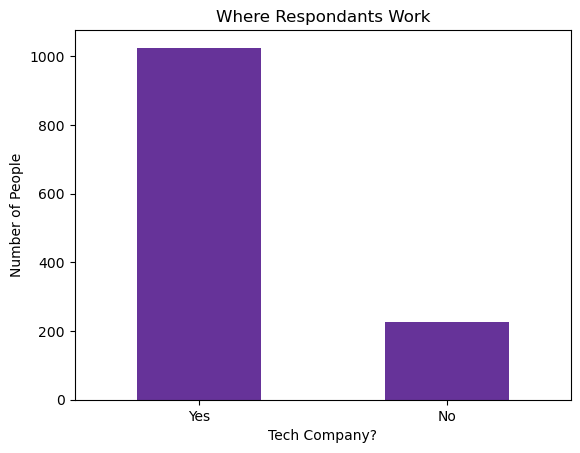

In [199]:
tech = df['tech_company'].value_counts()

tech.plot(kind='bar', color = 'rebeccapurple')
plt.title('Where Respondants Work')
plt.xticks(rotation=360) 
plt.xlabel('Tech Company?')
plt.ylabel('Number of People')
plt.show()

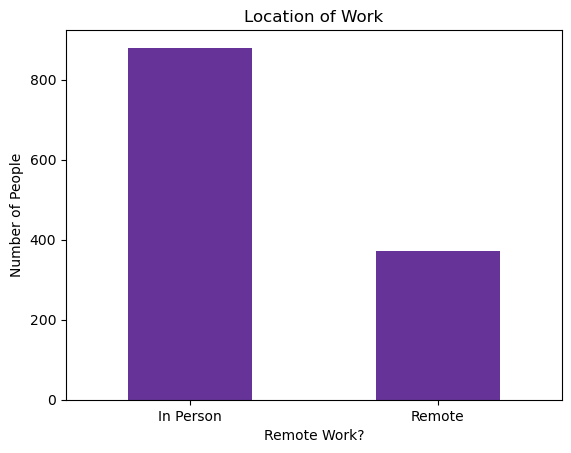

In [200]:
remote = df['remote_work'].value_counts()
remote.plot(kind = 'bar', color = 'rebeccapurple')
plt.xticks(rotation=360) 
plt.title('Location of Work')
plt.xlabel('Remote Work?')
plt.ylabel('Number of People')
plt.xticks([0,1], ['In Person', 'Remote'])
plt.show()


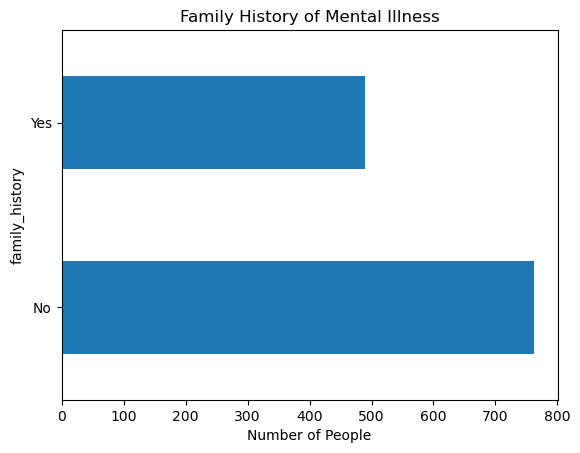

In [209]:

df['family_history'].value_counts().plot.barh()

plt.xticks(rotation=360) 
plt.title('Family History of Mental Illness')
plt.xlabel('Number of People')
plt.show()

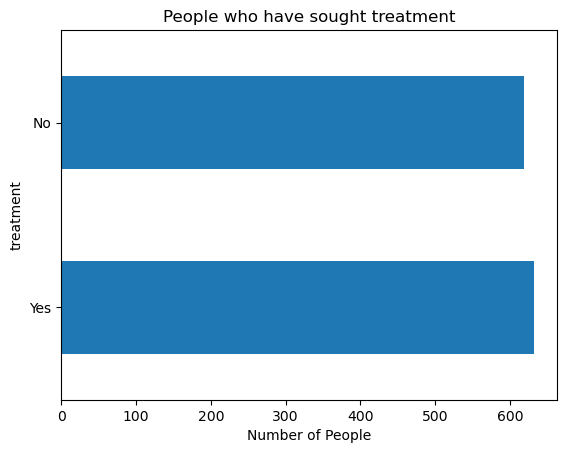

In [208]:

df['treatment'].value_counts().plot.barh()

plt.xticks(rotation=360) 
plt.title('People who have sought treatment')
plt.xlabel('Number of People')

plt.show()


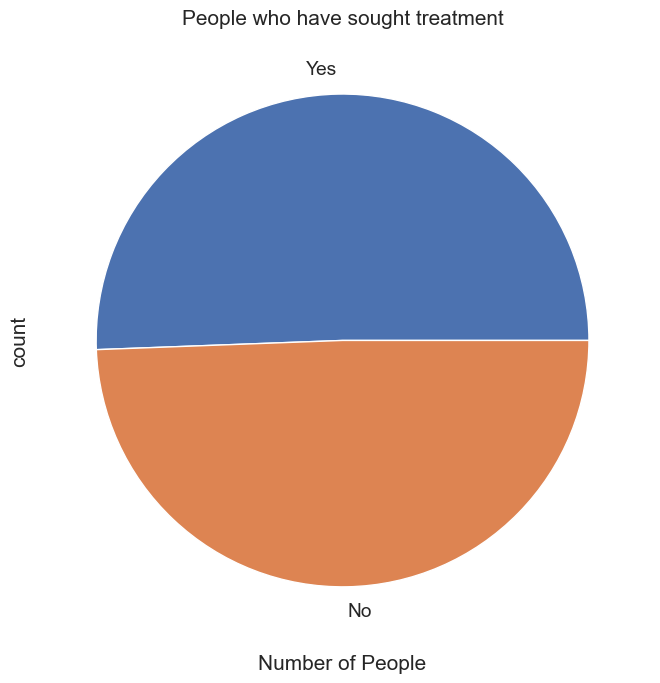

In [636]:
#Pie chart of people who have sought treatment

df['treatment'].value_counts().plot.pie()

plt.xticks(rotation=360) 
plt.title('People who have sought treatment')
plt.xlabel('Number of People')

plt.show()

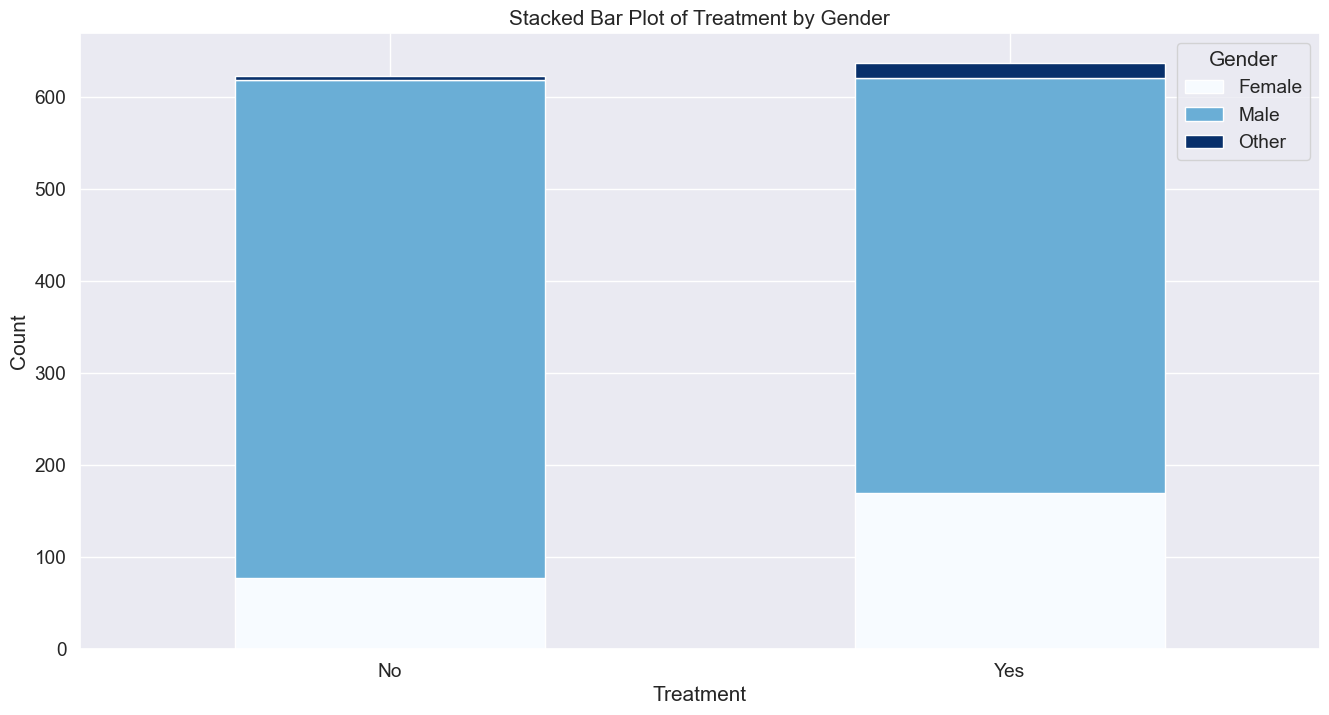

In [639]:
grouped_data = df.groupby(['treatment', 'Gender']).size().reset_index(name='count')

# Create a pivot table
pivot_table = grouped_data.pivot_table(index='treatment', columns='Gender', values='count', fill_value=0)

# Plot the stacked bar chart
pivot_table.plot.bar(stacked=True, colormap='Blues', title='Stacked Bar Plot of Treatment by Gender')

plt.xlabel('Treatment')
plt.xticks(rotation=360) 
plt.ylabel('Count')
plt.legend(title='Gender')
plt.savefig('gender_treatment_bar.png')
plt.show()

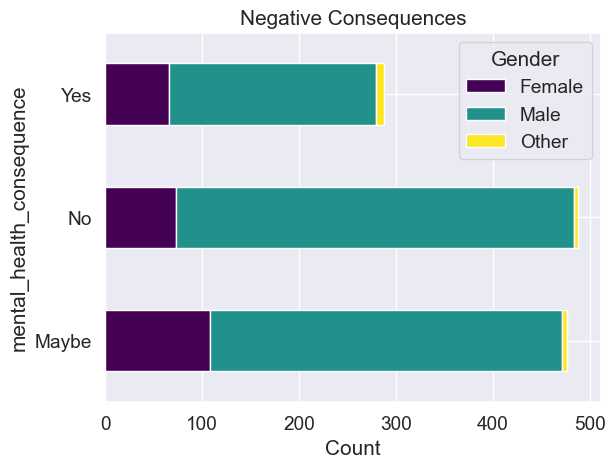

In [297]:
grouped_data = df.groupby(['mental_health_consequence', 'Gender']).size().reset_index(name='count')

# Create a pivot table
pivot_table = grouped_data.pivot_table(index='mental_health_consequence', columns='Gender', values='count', fill_value=0)

# Plot the stacked bar chart
pivot_table.plot.barh(stacked=True, colormap='viridis', title='Negative Consequences')
plt.xlabel('Count')
plt.ylabel('mental_health_consequence')
plt.legend(title='Gender')
plt.show()

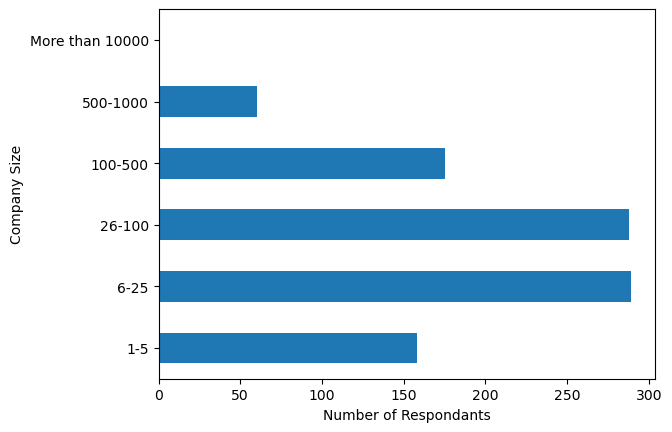

In [279]:
correct_order = ['1-5', '6-25', '26-100', '100-500','500-1000', 'More than 10000']
df['no_employees'].value_counts().reindex(correct_order).plot.barh()
plt.xticks(rotation=360) 
plt.xlabel('Number of Respondants')
plt.ylabel('Company Size')
plt.show()

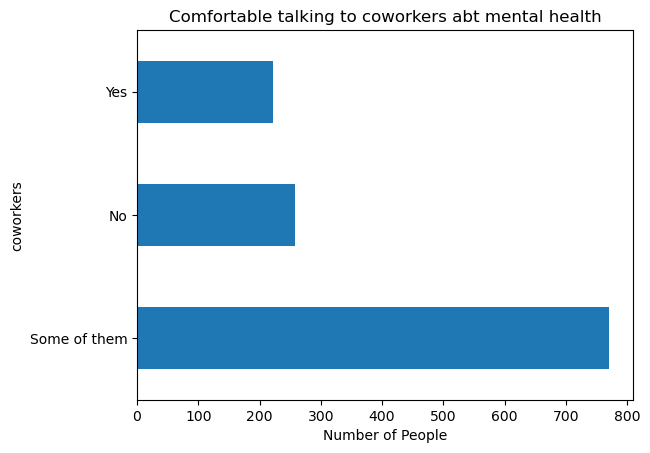

In [227]:
df['coworkers'].value_counts().plot.barh()

plt.xticks(rotation=360) 
plt.title('Comfortable talking to coworkers abt mental health')
plt.xlabel('Number of People')
plt.show()

In [ ]:
df['supervisors'].value_counts().plot.barh()

plt.xticks(rotation=360) 
plt.title('')
plt.xlabel('Number of People')
plt.show()

Seems like most people work at small sized companies. 
Curious to know whether people from larger companies feel different about mental health


# Select target variable (dependent variable)
y = df['mental_health_consequence']

Encoding data because most of it is categorical/ordinal

Understand the mental health consequence variable with relation to the feature variables

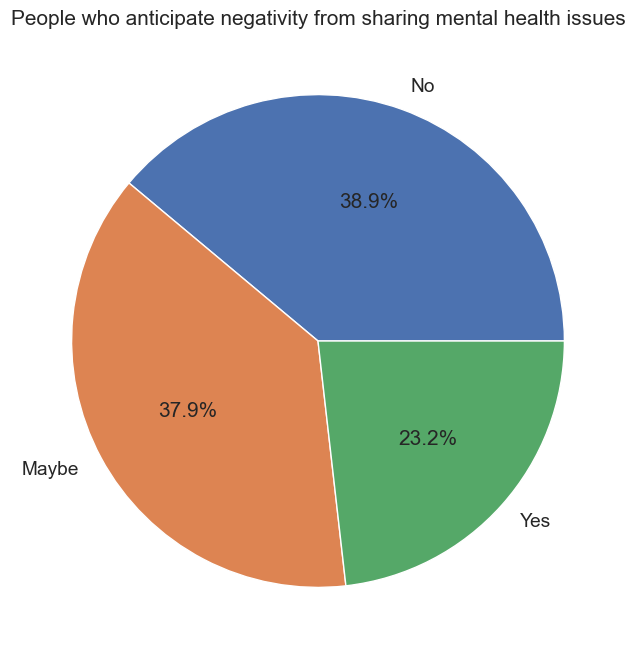

In [530]:
df['mental_health_consequence'].unique()

#Do you think discussing mental health issues with employers could have negative consequences?
value_counts = df['mental_health_consequence'].value_counts()
plt.pie(value_counts, labels=value_counts.index,autopct='%1.1f%%')

plt.title('People who anticipate negativity from sharing mental health issues')
plt.savefig('mental_health_consequence_pie.png')

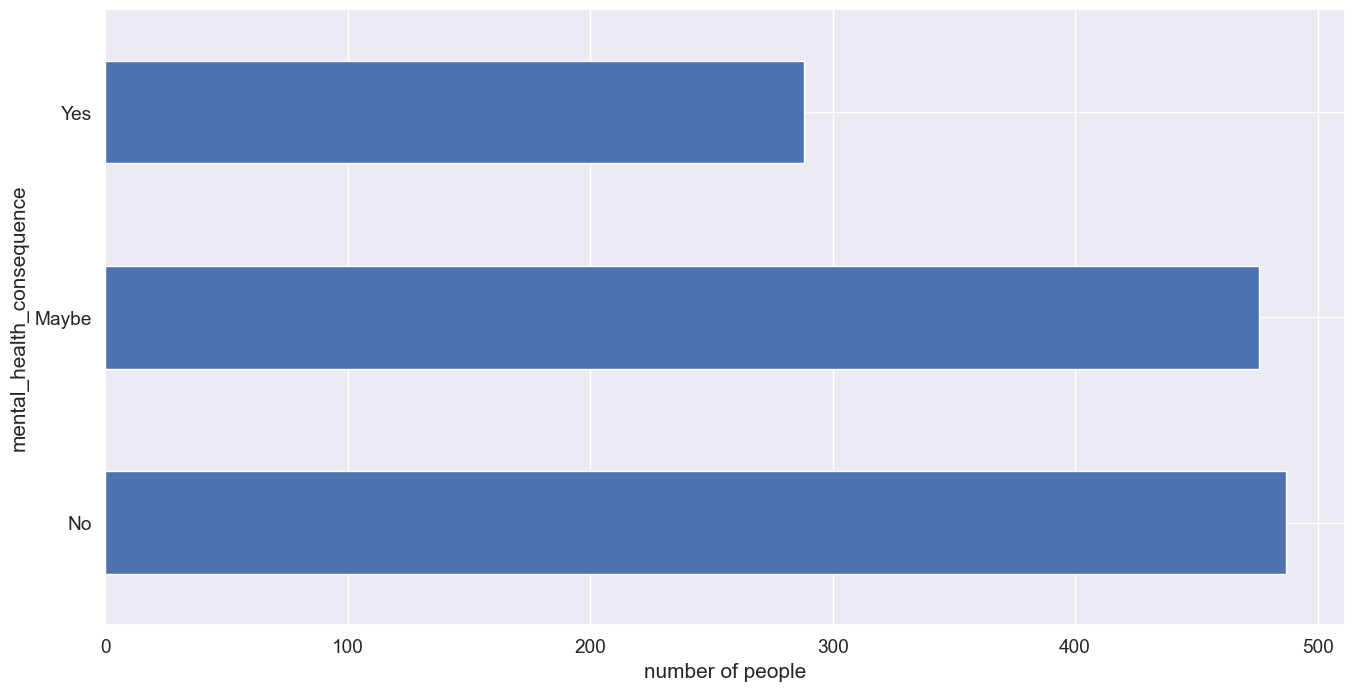

In [421]:
df['mental_health_consequence'].value_counts().plot.barh()
plt.xlabel('number of people')
plt.savefig('mental_health_consequence_count.png')
plt.show()

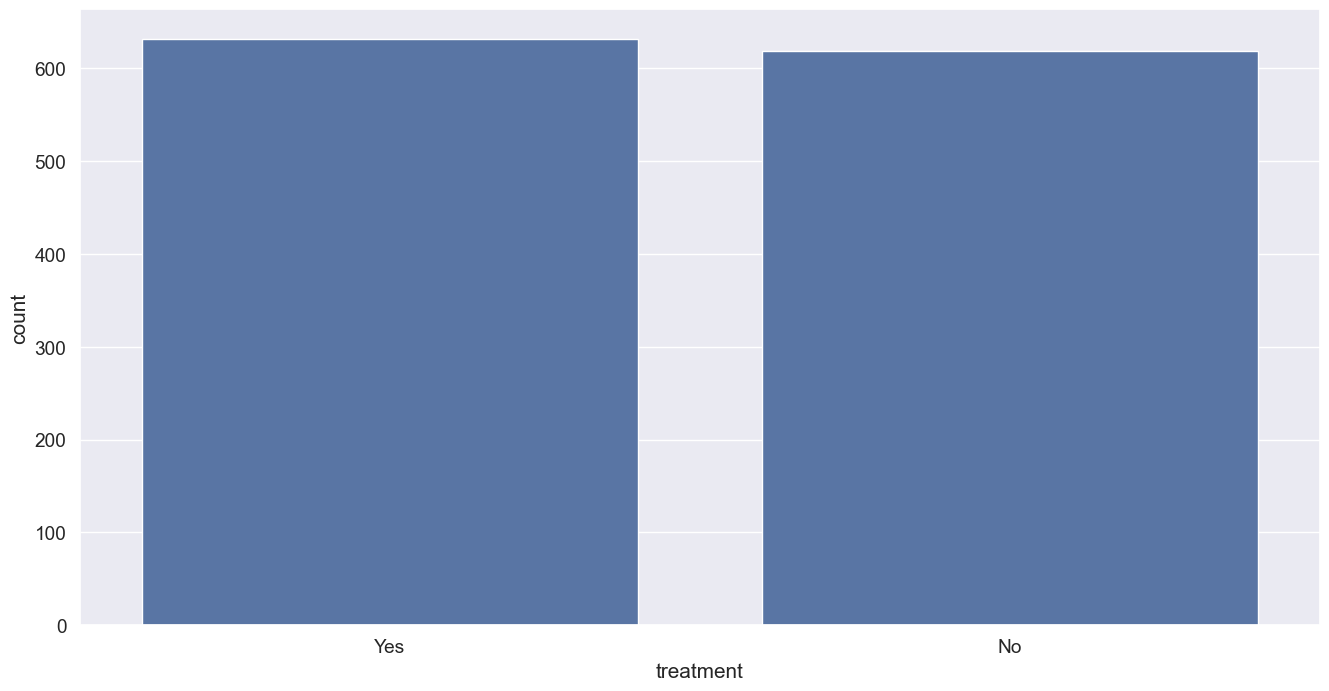

In [420]:
df['treatment'].value_counts()
sns.barplot(df['treatment'].value_counts())
plt.savefig('treatment_count.png')

# Splitting

In [798]:
#fill NANs with empty string until we learn other methods to fill them.

y = df['treatment'] 
X = df.loc[:, df.columns != 'treatment'] 
print(y)
print(X.head())

0       Yes
1        No
2        No
3       Yes
4        No
       ... 
1254    Yes
1255    Yes
1256    Yes
1257     No
1258    Yes
Name: treatment, Length: 1251, dtype: object
   Age  Gender         Country self_employed family_history work_interfere  \
0   37  Female   United States            No             No          Often   
1   44    Male   United States            No             No         Rarely   
2   32    Male          Canada            No             No         Rarely   
3   31    Male  United Kingdom            No            Yes          Often   
4   31    Male   United States            No             No          Never   

     no_employees remote_work tech_company    benefits  ...   anonymity  \
0            6-25          No          Yes         Yes  ...         Yes   
1  More than 1000          No           No  Don't know  ...  Don't know   
2            6-25          No          Yes          No  ...  Don't know   
3          26-100          No          Yes          No

In [799]:
random_state = 42

# first split to separate out the training set
X_train, X_test, y_train, y_test = train_test_split(X,y,\
                    train_size = 0.8,random_state = random_state)
print('training set:',X_train.shape, y_train.shape) # 80% of points in train
print(X_test.shape, y_test.shape) # 20% of points are in test

training set: (1000, 23) (1000,)
(251, 23) (251,)


# Preprocessing 

In [772]:
# preprocess with pipeline and columntransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

random_state = 42

In [800]:
# collect the various features
target = 'treatment'

#binary_ftrs = []

onehot_ftrs = ['Gender','Country', 'self_employed', 'family_history','remote_work', 
    'tech_company','benefits' ,'care_options', 'wellness_program','seek_help',
    'anonymity','mental_health_consequence', 'phys_health_consequence',
    'coworkers','supervisor','mental_health_interview','phys_health_interview',
    'mental_vs_physical','obs_consequence']

ordinal_ftrs = ['work_interfere','no_employees','leave']

ordinal_cats = [['Never','Rarely','Sometimes','Often'],
    ['1-5','6-25','26-100','100-500','500-1000','More than 1000'], 
    ['Very difficult','Somewhat difficult','Somewhat easy',
    'Very easy',"Don't know"]]

minmax_ftrs = ['Age']

binary_ftrs = ['self_employed','family_history','remote_work','tech_company','obs_consequence']


Instead of doing each encoder individually, I will be applying them to the dataset through the scikitlearn pipeline which does everything neatly for me all at once.

In [802]:
# collect all the encoders
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories = ordinal_cats), ordinal_ftrs),
        ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'), onehot_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs)])

clf = Pipeline(steps=[('preprocessor', preprocessor)]) # for now we only preprocess 
                                                       # later on we will add other steps here

X_train_prep = clf.fit_transform(X_train)
X_test_prep = clf.transform(X_test)



In [803]:
print(X_train.shape)
print(X_train_prep.shape)


(1000, 23)
(1000, 97)


In [782]:
correlation_matrix = df.corr()
f, ax = plt.subplots(figsize=(20 ,18))
sns.heatmap(correlation_matrix, square=True, annot = True, linecolor= 'Black',  annot_kws={"fontsize":12}, vmin= -1, vmax = 1, cmap= 'Blues')
plt.savefig(fname = "correlation_map.png")
plt.show()


ValueError: could not convert string to float: 'Female'

AttributeError: 'numpy.ndarray' object has no attribute 'corr'